In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.sparse import csr_matrix
from starter_code import construct_system

In [2]:
# Can Dimensions [m]
h = 0.12
r = 0.03
d = 2*r

kfun = lambda r, z : 0.58 #[W m-1 K-1] @ 10 C
qppp = lambda r, z : 0 # no heat gen in can

k = kfun(0,0)
mu = 17.916e-4 # {Pa*s}
rho = 1000 # ~{kg/m^3}
w = np.pi*d # {m/s}
c_p = 4.22 * 1000 # {J/kg*K}

Re = rho * w * d / mu
Pr = c_p * mu / k
Nu = 0.133 * Re**(2/3) * Pr**(1/3)
HTC = Nu*k/d

T_oo = 1 # {C}

In [3]:
N_r = 30
N_z = 120

r_edge = np.linspace(0, r, N_r+1)
z_edge = np.linspace(0, h, N_z+1)

r_center = r_edge[1:]-r_edge[0]/2
z_center = z_edge[1:]-z_edge[0]/2

In [4]:
BC_z = ('robin', HTC, T_oo)
BC_r_top = ('neumann', 0)#('robin', HTC, T_oo)
BC_r_bottom = ('neumann', 0)#('robin', HTC, T_oo)

In [5]:
A, b = construct_system(r_center, z_center, kfun, qppp,
                        BC_z, BC_r_top, BC_r_bottom)
A_spc = csr_matrix(A)

In [6]:
#plt.imshow(T.reshape((N_z, N_r)), cmap="inferno",vmin=0,vmax=max(T)); cbar = plt.colorbar();

In [20]:
def T_prime(t, T, A, b, rho, c_p):
    return (b - A@T)*rho*c_p

In [21]:
T0 = 35 * np.ones(A.shape[0]) # {deg C}

t_initial = 0
t_final = 0.001
t_eval = np.linspace(t_initial, t_final, 100) # times at which we want the solution; otherwise, the solver selects!

sol = solve_ivp(T_prime, [t_initial, t_final], T0, 
                args=(A_spc, b, rho, c_p),
                t_eval=t_eval,
                method='BDF')

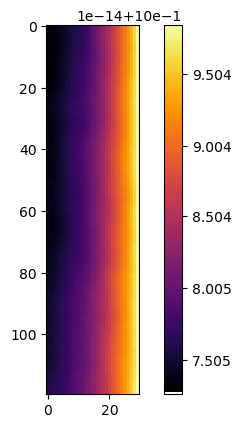

In [24]:
i=1
plt.imshow(sol.y[:,i].reshape((N_z, N_r)), cmap="inferno"); cbar = plt.colorbar();

In [25]:
max(sol.y[:,i])

np.float64(0.9999999999999987)

1033.5014755063557